In [265]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dresslar CAS522 M4 Notebook


In [266]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.shared import solve_and_plot_continuous_SIR, unpack_solution


### The Continuous SIR System, Revisted

As we recall from our notebook from the previous model, the continuous model of the SIR, generates predictable growth and loss curves for populations of $S $ susceptible, $I $ infected, and $R $ recovered individuals, with the outcomes based upon parameterized contact and recovery rates. When adapated to account for immunity loss rate, these outcomes are no less deterministic, but there is some additional variation in the growth and recession of the three curves. We can illustrate this variation with a bit more visual impact by choosing some variables that lead to more complex system behavior (and in particular repeating regime changes): `c` 0.001, `r` = 0.05, and `lambda_` = 0.0025.

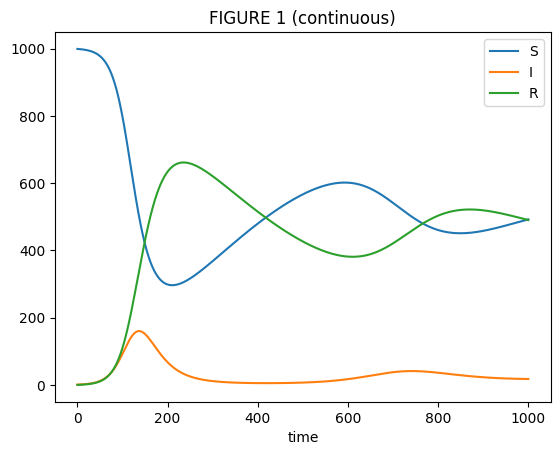

lambda_ = 0.0025: 
final value of S = 492.13550987360935 
final value of I = 17.624218763616565 
final value of R = 490.24027136277306 


In [267]:
# starting conditions with population of 1000
N = 1000
I0 = 1             # our veritable Typhoid Mary
S0 = N - I0        # 999
R0 = 0             # no recovered individuals at the start
x0 = [S0, I0, R0]

# parameters
c = 0.0001         # contact rate
r = 0.05          # recovery rate
lambda_ = 0.0025    # immunity loss rate (0.00)

# time
T = 1000

# solve and plot
x_S, x_I, x_R = solve_and_plot_continuous_SIR(
    x0,
    c,
    r,
    lambda_,
    T,
    plot_title = 'FIGURE 1 (continuous)'
)

continuous_model_final_values = (x_S[-1], x_I[-1], x_R[-1])
print(f"lambda_ = {lambda_}: \nfinal value of S = {x_S[-1]} \nfinal value of I = {x_I[-1]} \nfinal value of R = {x_R[-1]} ")


As we can see, even after 1000 time points, the system continues to reverberate, though it will indeed approach equilibrium after another thousand ticks or so. 

<p style="text-align:center">. . .</p>

### From Differential to Difference Equations: Base Approach

From the prior notebook, the modified equations appear as follows:

\begin{align}
\frac{dS}{dt} &= -cSI + \lambda R \\
\frac{dI}{dt} &= cSI - rI \\
\frac{dR}{dt} &= rI - \lambda R
\end{align}

Let us implement this system as a Python function. Recall that the vector `x` is used to store state vectors that our system operates on: S, I, and R.

In [268]:
def sir_with_immune_decay(x, c, r, lambda_):
    S_t, I_t, R_t = x
    dS = -c * S_t * I_t + lambda_ * R_t
    dI = c * S_t * I_t - r * I_t
    dR = r * I_t - lambda_ * R_t


    # from the M4 notes: S_t_plus_1 = S_t - cS t I t .
    # here we (very) explicitly update the values of S, I, and R
    S_t_plus_1 = S_t + dS  
    I_t_plus_1 = I_t + dI
    R_t_plus_1 = R_t + dR

    return [S_t_plus_1, I_t_plus_1, R_t_plus_1]


Now we are ready to complete our assignment:

> **Covert the SIR model (see coding assignment of Module 3) into a discrete-time system.**

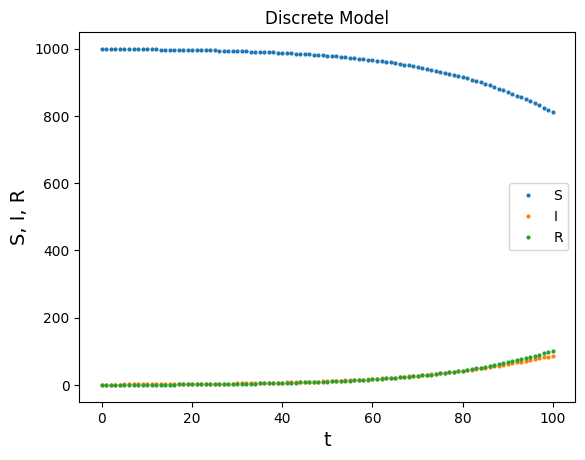

(811.570502337518, 87.16103609690312, 101.26846156557883)

In [269]:
def do_assignment(T, marker_size=0, no_text=False, plot_title="Discrete Model"):
    x0 = 999, 1, 0

    c = 0.0001
    r = 0.05
    lambda_ = 0.0025

    x = [x0] # initialize state vector

    for t in range(T):  # will give us t_max steps PLUS the initial condition.
        x_t = sir_with_immune_decay(x[-1], c, r, lambda_)
        # print(f"x_t = {x_i}")
        x.append(x_t)

    # in case it's helpful:
    # print(type(x), type(x[0]), type(x[0][0]), len(x), len(x[0])) 
    # <class 'list'> <class 'tuple'> <class 'int'> 1001 3

    x_S = []  # unpacking... since we are using the assigned approach, our output is list of 3-value lists and we can't use unpack_solution()
    x_I = []
    x_R = []

    for j in range(T + 1):    # sooo tricky
        x_S.append(x[j][0])
        x_I.append(x[j][1])
        x_R.append(x[j][2])

    # linestyle is '-' if the markers are not shown
    ls = '-' if marker_size == 0 else ''

    plt.plot(range(T + 1),x_S, label='S', marker='o', markersize=marker_size, linestyle=ls)
    plt.plot(range(T + 1),x_I, label='I', marker='o', markersize=marker_size, linestyle=ls)
    plt.plot(range(T + 1),x_R, label='R', marker='o', markersize=marker_size, linestyle=ls)
    plt.xlabel('t',size=14)
    plt.ylabel('S, I, R',size=14)
    plt.legend()
    plt.title(plot_title)
    plt.show()

    if not no_text:
        print(f"{len(x)} data points processed.")
        print(f"lambda_ = {lambda_}: \nfinal value of S = {x[-1][0]} \nfinal value of I = {x[-1][1]} \nfinal value of R = {x[-1][2]} ")
    

    return x_S[-1], x_I[-1], x_R[-1]

T = 100
do_assignment(T, marker_size=2, no_text=True)

We can see---*just barely* at this scale---that our plot shows individual points, computed as discrete values for time points `t` in `T`. We set our `T` to 100 here so we get a little bit of "action" in the plotting and yet still see individual points. 

So, we should now have faithfully completed our initial directive. However, let's go ahead and run our discrete version of the system for the complete set of 1000 steps and see how the output compares to our continuous version, above.

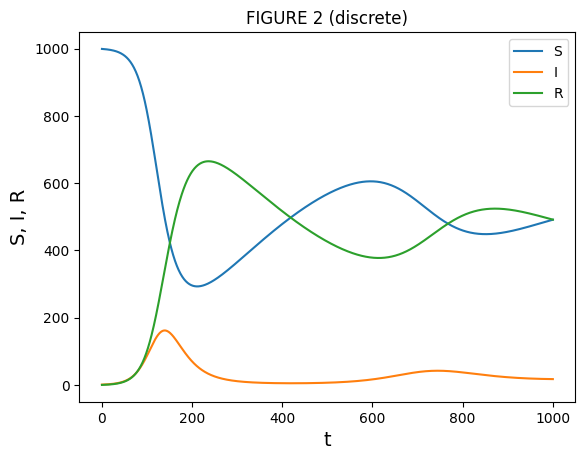

1001 data points processed.
lambda_ = 0.0025: 
final value of S = 491.25276834204857 
final value of I = 17.286228277611713 
final value of R = 491.46100338033835 


In [270]:
T = 1000
discrete_model_final_values = do_assignment(T, marker_size=0, plot_title='FIGURE 2 (discrete)')

If you compare the two plots (FIGURE 1 and FIGURE 2, which are continuous and discrete, respectively), the outputs look very nearly identical. However, they are not *entirely* identical: below is a comparison of the final states of both models.

In [ ]:
differences = discrete_model_final_values[0] - continuous_model_final_values[0], discrete_model_final_values[1] - continuous_model_final_values[1], discrete_model_final_values[2] - continuous_model_final_values[2]  # not pretty!
percent_differences = [round(abs(diff / continuous_model_final_values[i]) * 100, 4) for i, diff in enumerate(differences)]

print(f"Absolute Differences: {differences[0]}, {differences[1]}, {differences[2]}")
print(f"Percent Differences: {percent_differences[0]}, {percent_differences[1]}, {percent_differences[2]}")

Absolute Differences: -0.8827415315607823, -0.33799048600485193, 1.2207320175652967
Percent Differences: 0.1794, 1.9178, 0.249


This difference, while small, is significant enough to make a difference, and it occurs because our discrete model is *estimating* change based on a method called the "Euler Method"---in this particular implementation, more specifically known as either the Explicit Euler Method or the Forward Euler Method.

### Explicit Euler described

While there are many descriptions and tutorials on Euler Method conversion of Ordinary Differential Equations (ODEs), a lengthy discussion using Python [can be found](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html) in Chapter 22 of the online version of the Berkeley textbook, [Berkeley Python Numerical Methods](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html).

As the text describes (and in parallel with the supplied note for this module), the approach we use above, "(s)tarting from a given initial value of 𝑆0=𝑆(𝑡0), integrate(s) the states up to 𝑆(𝑡𝑓); these 𝑆(𝑡) values are then an approximation for the solution of the differential equation." [1] The reason these values are an approximation is that the slope of the line at the computed point is estimated using the slope at the prior point being used to execute the functional calculation. 

As a result of this, the relative width of the intervals is directly related to the error of the solution produced by the method. Another resource on the method, Wolfram [2], offers a description of local error (or error per-step) as $O(h\sup2) $. A more detailed exploration of the measure of $O $ is beyond the scope of this assignment, but we can easily test the impact of step-size on error, by adding a `dt` variable to our prior function.

In our prior iteration of the function, (and as mentioned in the class supplement), the step size (`dt`) is implicitly 1.0. Here, we divide by a value for `dt`, which would usually be a number between 0 and 1, to get a total number of steps. We still want for our function to be measuring values for our

In [272]:
def sir_with_immune_decay_step_size(x, c, r, lambda_, dt):
    # note that when dt is 1, this simply resolves to sir_with_immune_decay()
    S_t, I_t, R_t = x
    dS = -c * S_t * I_t + lambda_ * R_t
    dI = c * S_t * I_t - r * I_t
    dR = r * I_t - lambda_ * R_t


    # here, we add the changes---now scaled by dt---to the state variables.
    # the extra parens are for visual clarity
    S_t_plus_1 = S_t + (dS * dt)
    I_t_plus_1 = I_t + (dI * dt)
    R_t_plus_1 = R_t + (dR * dt)

    return [S_t_plus_1, I_t_plus_1, R_t_plus_1]


def do_assignment_step_size(T, dt):
    x0 = 999, 1, 0

    c = 0.0001
    r = 0.05
    lambda_ = 0.0025

    x = [x0] # initialize state vector

    steps = int(T / dt)

    for t in range(steps):  # will give us t_max steps PLUS the initial condition.
        x_t = sir_with_immune_decay_step_size(x[-1], c, r, lambda_, dt)
        # print(f"x_t = {x_i}")
        x.append(x_t)

    # in case it's helpful:
    # print(type(x), type(x[0]), type(x[0][0]), len(x), len(x[0])) 
    # <class 'list'> <class 'tuple'> <class 'int'> 1001 3

    print(f"{len(x)} data points processed, representing {T} time plus the starting state.")
    print(f"lambda_ = {lambda_}: \n")
    print(f"dt = {dt}: \n")
    print(f"final value of S = {x[-1][0]} \nfinal value of I = {x[-1][1]} \nfinal value of R = {x[-1][2]} ")
    
    x_S = []  # unpacking... since we are using the assigned approach, our output is list of 3-value lists and we can't use unpack_solution()
    x_I = []
    x_R = []

    for j in range(len(x)):
        x_S.append(x[j][0])
        x_I.append(x[j][1])
        x_R.append(x[j][2])

    return x_S[-1], x_I[-1], x_R[-1]

T = 1000
discrete_model_with_step_size_values = do_assignment_step_size(T, 0.1)



10001 data points processed, representing 1000 time plus the starting state.
lambda_ = 0.0025: 

dt = 0.1: 

final value of S = 492.0537447697972 
final value of I = 17.591010215935412 
final value of R = 490.35524501426346 


We can now compare with our continuous and initial discrete (implicit `dt` = 1) model.

In [275]:
table_head = "| model | S_T | I_T | R_T |"
table_row = "| {model} | {S} | {I} | {R} |"

models = ["continuous", "discrete", "discrete_stepped"]

print("Final Values:")
print(table_head)
print(table_row.format(model=models[0], S=continuous_model_final_values[0], I=continuous_model_final_values[1], R=continuous_model_final_values[2]))
print(table_row.format(model=models[1], S=discrete_model_final_values[0], I=discrete_model_final_values[1], R=discrete_model_final_values[2]))  
print(table_row.format(model=models[2], S=discrete_model_with_step_size_values[0], I=discrete_model_with_step_size_values[1], R=discrete_model_with_step_size_values[2]))

differences_1 = discrete_model_final_values[0] - continuous_model_final_values[0], discrete_model_final_values[1] - continuous_model_final_values[1], discrete_model_final_values[2] - continuous_model_final_values[2] 
differences_2 = discrete_model_with_step_size_values[0] - continuous_model_final_values[0], discrete_model_with_step_size_values[1] - continuous_model_final_values[1], discrete_model_with_step_size_values[2] - continuous_model_final_values[2] 

print("\nDifferences:")
print(table_head)
print(table_row.format(model=models[0], S=0.0, I=0.0, R=0.0))
print(table_row.format(model=models[1], S=differences_1[0], I=differences_1[1], R=differences_1[2]))
print(table_row.format(model=models[2], S=differences_2[0], I=differences_2[1], R=differences_2[2]))





Final Values:
| model | S_T | I_T | R_T |
| continuous | 492.13550987360935 | 17.624218763616565 | 490.24027136277306 |
| discrete | 491.25276834204857 | 17.286228277611713 | 491.46100338033835 |
| discrete_stepped | 492.0537447697972 | 17.591010215935412 | 490.35524501426346 |

Differences:
| model | S_T | I_T | R_T |
| continuous | 0.0 | 0.0 | 0.0 |
| discrete | -0.8827415315607823 | -0.33799048600485193 | 1.2207320175652967 |
| discrete_stepped | -0.0817651038121312 | -0.03320854768115211 | 0.11497365149040206 |
